In [1]:
#!usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: smilex
"""

#modules
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [2]:
#efficiency matrix calculations
#--------------------

#DATA! data from the experiment between asteriks

#*****
#total ee, mm, tt, qq events
tot = np.array([56720, 89887, 79214, 98563])

#ee, mm, tt, qq cuts on monte carlo events
ee = np.array([18835*1.5829, 0, 26, 0]) #ee cut applied to ee, mm, tt, qq MC
mm = np.array([0, 76209, 35, 0]) #mm cut applied to ee, mm, tt, qq MC
tt = np.array([378, 8599, 71131, 173]) #tt cut applied to ee, mm, tt, qq MC
qq = np.array([0, 0, 135, 92164]) #qq cut applied to ee, mm, tt, qq MC
#*****

#efficiency matrix
eff = np.zeros([4,4])

eff[0] = ee/tot
eff[1] = mm/tot
eff[2] = tt/tot
eff[3] = qq/tot

#efficiency inverse
effinv = np.linalg.inv(eff)

#error in efficiency matrix
deltaeff = np.zeros([4,4])

deltaeff[0] = np.sqrt(eff[0, :]*(1-eff[0, :])/tot[0])
deltaeff[1] = np.sqrt(eff[1, :]*(1-eff[1, :])/tot[1])
deltaeff[2] = np.sqrt(eff[2, :]*(1-eff[2, :])/tot[2])
deltaeff[3] = np.sqrt(eff[3, :]*(1-eff[3, :])/tot[3])

effinvsq = np.square(effinv)
deltaeffsq = np.square(deltaeff)

#error in efficiency inverse matrix
deltaeffinv = np.sqrt(np.matmul(effinvsq, (np.matmul(deltaeffsq, effinvsq))))

#efficiency matrix
print("*****")
print("Efficiency matrix:")
print(np.round(eff, 2))

#delta efficiency
print("+-")
print(np.round(deltaeff, 3))
print("*****")

#inverse efficiency matrix
print("Inverse efficiency matrix:")
print(np.round(effinv, 4))

#delta inverse efficiency
print("+-")
print(np.round(deltaeffinv, 5))
print("*****")
#--------------------

*****
Efficiency matrix:
[[0.53 0.   0.   0.  ]
 [0.   0.85 0.   0.  ]
 [0.01 0.1  0.9  0.  ]
 [0.   0.   0.   0.94]]
+-
[[0.002 0.    0.    0.   ]
 [0.    0.001 0.    0.   ]
 [0.    0.001 0.001 0.   ]
 [0.    0.    0.    0.001]]
*****
Inverse efficiency matrix:
[[ 1.9025e+00  1.0000e-04 -7.0000e-04  0.0000e+00]
 [ 0.0000e+00  1.1795e+00 -6.0000e-04  0.0000e+00]
 [-1.4100e-02 -1.2570e-01  1.1137e+00 -2.1000e-03]
 [ 0.0000e+00  2.0000e-04 -2.0000e-03  1.0694e+00]]
+-
[[7.59e-03 2.00e-05 1.60e-04 0.00e+00]
 [0.00e+00 1.67e-03 9.00e-05 0.00e+00]
 [6.20e-04 1.39e-03 1.33e-03 1.80e-04]
 [0.00e+00 2.00e-05 1.60e-04 9.00e-04]]
*****


In [3]:
#cross section calculations
#--------------------

#root-s values labels
#0: 88.47 GeV
#1: 89.46 GeV
#2: 90.22 GeV
#3: 91.22 GeV
#4: 91.97 GeV
#5: 92.96 GeV
#6: 93.71 GeV

#particle counts measured
partcount = np.zeros([7, 4])

#integrated luminosity values for data6.root
intlum = np.array([675.9, 800.8, 873.7, 7893.5, 825.3, 624.6, 942.2])
deltaintlum = np.array([5.7, 6.6, 7.1, 54.3, 6.9, 5.5, 7.7])

#radiative corrections - values taken from the manual
leptoncorrection = np.array([0.09, 0.20, 0.36, 0.52, 0.22, -0.01, -0.08])
hadroncorrection = np.array([2.0, 4.3, 7.7, 10.8, 4.7, -0.2, -1.6])

#DATA! data from the experiment between asteriks

#*****
partcount[0] = [106, 120, 251, 3281] #ee, mm,tt, qq counts for sqrt label 0
partcount[1] = [261, 304, 425, 7413] #ee, mm,tt, qq counts for sqrt label 1
partcount[2] = [415, 591, 693,14709] #ee, mm,tt, qq counts for sqrt label 2
partcount[3] = [4839, 8681, 10178, 221068] #ee, mm,tt, qq counts for sqrt label 3
partcount[4] = [393, 767, 863, 18727] #ee, mm,tt, qq counts for sqrt label 4
partcount[5] = [150, 296, 427, 8100] #ee, mm,tt, qq counts for sqrt label 5
partcount[6] = [178, 339, 459, 8635] #ee, mm,tt, qq counts for sqrt label 6
#*****

#actual particle counts
partcountact = np.zeros([7, 4])
for i in range(7):
    partcountact[i] = np.matmul(effinv, partcount[i])
print("Actual particle counts:")
print(partcountact)

#delta actual particle counts
deltapartcountact = np.zeros([7, 4])

deltaeffinvsq = np.square(deltaeffinv)

for i in range(7):
    deltapartcountact[i] = np.matmul(deltaeffinvsq, np.square(partcount[i])) + \
        np.matmul(effinvsq, partcount[i])
deltapartcountact = np.sqrt(deltapartcountact)

print("+-")
print(deltapartcountact)
print("*****")

#cross sections
sigma = np.zeros([7, 4])
for i in range(7):
    sigma[i] = partcountact[i]/intlum[i]
for i in range(7):
    sigma[i, :3] = sigma[i, :3] + leptoncorrection[i]
    sigma[i, 3] = sigma[i, 3] + hadroncorrection[i]
print("Cross sections:")
print(sigma)

#delta cross sections
deltasigma = np.zeros([7, 4])

for i in range(7):
    deltasigma[i] = np.square(deltapartcountact[i])/np.square(intlum[i]) + \
        np.square(partcountact[i])*np.square(deltaintlum[i])/np.power(intlum[i], 4)
deltasigma = np.sqrt(deltasigma)

print("+-")
print(deltasigma)
print("*****")
#--------------------

Actual particle counts:
[[2.01501574e+02 1.41404147e+02 2.56104801e+02 3.50833496e+03]
 [4.96284143e+02 3.58345190e+02 4.15940757e+02 7.92693081e+03]
 [7.89111076e+02 6.96728313e+02 6.60921372e+02 1.57290498e+04]
 [9.19997178e+03 1.02340045e+04 9.71393407e+03 2.36399175e+05]
 [7.47157441e+02 9.04233887e+02 8.20045428e+02 2.00257319e+04]
 [2.85108212e+02 3.48907596e+02 4.19304646e+02 8.66162349e+03]
 [3.38359351e+02 3.99610273e+02 4.48025880e+02 9.23371650e+03]]
+-
[[ 19.6037424   12.92284681  17.71266328  61.32798734]
 [ 30.79926935  20.57236295  23.11453165  92.31712897]
 [ 38.88428966  28.69232559  29.62135262 130.3719934 ]
 [137.35196901 110.85300894 120.98123695 540.56358903]
 [ 37.83311018  32.69234835  33.10920195 147.31071322]
 [ 23.32836959  20.2997087   23.1717015   96.52333147]
 [ 25.41822333  21.72513266  24.03525611  99.6786921 ]]
*****
Cross sections:
[[ 0.38812335  0.29920868  0.46890931  7.19061246]
 [ 0.81973544  0.647484    0.71940654 14.19876475]
 [ 1.2631831   1.1574

In [4]:
#forward backward asymmetry calculations
#--------------------

#DATA! data from the experiment between the asteriks

#*****
nminus = np.array([69, 156, 319, 4384, 380, 123, 150]) #backward counts for mm
nplus = np.array([51, 148, 272, 4297, 387, 173, 189]) #forward counts for mm
#*****

#afb correction values - taken from the manual
afbcorrection = np.array([0.021512, 0.019262, 0.016713, 0.018293, 0.030286, 0.062196, 0.093850])

#afb and weinbergtheta
afb = (nplus - nminus)/(nplus + nminus) + afbcorrection
weinbergtheta = (1/4)*(1 - np.sqrt(afb[3]/3))

#delta afb
deltaafb = np.sqrt((nminus*np.square(2*nplus/np.square(nplus+nminus))) + \
                   (nplus*np.square(2*nminus/np.square(nplus+nminus))))
deltaweinbergtheta = (1/2)*(deltaafb[3]/afb[3])*weinbergtheta

print("AFB values:")
print(afb)
print("+-")
print(deltaafb)
print("*****")

print("Weinberg theta: ", weinbergtheta, "+-", deltaweinbergtheta)
print("*****")
#--------------------

AFB values:
[-0.128488   -0.00705379 -0.06281323  0.00827111  0.03941247  0.23111492
  0.20889425]
+-
[0.09025427 0.05733407 0.04100422 0.01073231 0.0361064  0.05728858
 0.05395193]
*****
Weinberg theta:  0.2368731246414336 +- 0.1536792186111655
*****


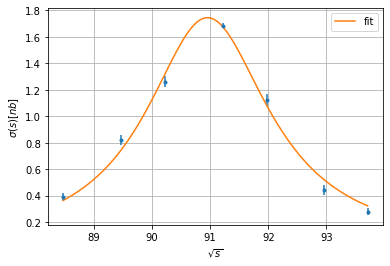

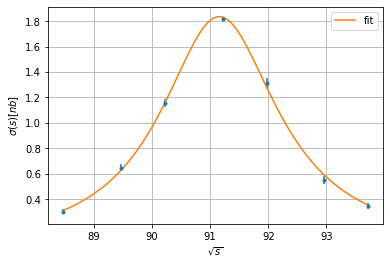

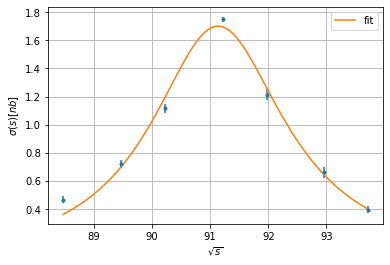

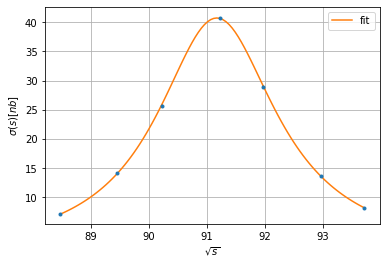

Fit parameters:
ee:  [9.09727777e+01 2.59141049e+00 6.61481412e-03]
mm:  [9.11738948e+01 2.46200528e+00 6.30590704e-03]
tt:  [9.11586033e+01 2.82515594e+00 7.69088021e-03]
qq:  [91.18699079  2.51469417  0.14603198]
*****
Standard deviation values:
ee:  [0.04709559 0.1575536  0.00062915]
mm:  [0.02113831 0.05963059 0.00024604]
tt:  [0.05838673 0.1792196  0.00078462]
qq:  [0.0035297  0.01003186 0.00093975]
*****
Reduced chi squared values:
ee fit:  0.931109832987318
mm fit:  0.5253490457033164
tt fit:  1.440398234851856
qq fit:  0.38064376611615275
*****


In [5]:
#breit wigner curve fit
#--------------------
#a: Z mass
#b: Z decay width
#gammach: product of electron decay width and the final state decay width
def fitfunc(x, a, b, gammach):
    sigmaofs = (12 * np.pi * 3.89E5 * gammach * x) / \
        (a**2 * ((x - a**2)**2 + (x * b/a)**2))
    return sigmaofs

#s values - taken from the manual (notice the square!)
sqrts = np.array([88.47, 89.46, 90.22, 91.22, 91.97, 92.96, 93.71])
x_data = np.square(sqrts)

#slice ee sigma values
ee_data = sigma[:, 0]
ee_data_err = deltasigma[:, 0]

#slice mm sigma values
mm_data = sigma[:, 1]
mm_data_err = deltasigma[:, 1]

#sllice tt sigma values
tt_data = sigma[:, 2]
tt_data_err = deltasigma[:, 2]

#slice qq sigma values
qq_data = sigma[:, 3]
qq_data_err = deltasigma[:, 3]


#fit for leptons
#fit guess taken as 91, 2.5 and 6.5 - Z mass and decay width and channel decay width
popt_ee, pcov_ee = curve_fit(fitfunc, x_data, ee_data, p0 = [91, 2.5, 6.5])
popt_mm, pcov_mm = curve_fit(fitfunc, x_data, mm_data, p0 = [91, 2.5, 6.5])
popt_tt, pcov_tt = curve_fit(fitfunc, x_data, tt_data, p0 = [91, 2.5, 6.5])

#fit for hadrons
#fit guess taken as 91, 2.5 and 150 - Z mass and decay width and channel decay width
popt_qq, pcov_qq = curve_fit(fitfunc, x_data, qq_data, p0 = [91, 2.5, 150])

#x axis values for plots
sqrts_model = np.linspace(min(sqrts), max(sqrts), 100)
x_model = np.square(sqrts_model)

#ee fit
ee_model = fitfunc(x_model, popt_ee[0], popt_ee[1], popt_ee[2])
plt.errorbar(sqrts, ee_data, yerr = ee_data_err, fmt = ".")
plt.plot(sqrts_model, ee_model, label = 'fit')
plt.xlabel('$\sqrt{s}$')
plt.ylabel('$\sigma(s) [nb]$')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#mm fit
mm_model = fitfunc(x_model, popt_mm[0], popt_mm[1], popt_mm[2])
plt.errorbar(sqrts, mm_data, yerr = mm_data_err, fmt = ".", label = 'data')
plt.plot(sqrts_model, mm_model, label = 'fit')
plt.xlabel('$\sqrt{s}$')
plt.ylabel('$\sigma(s) [nb]$')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#tt fit
tt_model = fitfunc(x_model, popt_tt[0], popt_tt[1], popt_tt[2])
plt.errorbar(sqrts, tt_data, yerr = tt_data_err, fmt = ".", label = 'data')
plt.plot(sqrts_model, tt_model, label ='fit')
plt.xlabel('$\sqrt{s}$')
plt.ylabel('$\sigma(s) [nb]$')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#qq fit
qq_model = fitfunc(x_model, popt_qq[0], popt_qq[1], popt_qq[2])
plt.errorbar(sqrts, qq_data, yerr = qq_data_err, fmt = ".", label = 'data')
plt.plot(sqrts_model, qq_model, label = 'fit')
plt.xlabel('$\sqrt{s}$')
plt.ylabel('$\sigma(s) [nb]$')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#print a, b and gammach for all branches
print("Fit parameters:")
print("ee: ", popt_ee)
print("mm: ", popt_mm)
print("tt: ", popt_tt)
print("qq: ", popt_qq)
print("*****")

ee_err = np.sqrt(np.diag(pcov_ee))
mm_err = np.sqrt(np.diag(pcov_mm))
tt_err = np.sqrt(np.diag(pcov_tt))
qq_err = np.sqrt(np.diag(pcov_qq))
print("Standard deviation values:")
print("ee: ", ee_err)
print("mm: ", mm_err)
print("tt: ", tt_err)
print("qq: ", qq_err)
print("*****")

#reduced chi2 calculations
def redchi2(f, x, y, y_err, *args):
    sum = 0
    for i in range(len(x)):
        sum += np.square((f(x[i], *args) - y[i])/(y_err[i]))
    dof = len(y) - len(args)
    rc2 = np.sqrt(sum)/dof
    return rc2

print("Reduced chi squared values:")
print("ee fit: ", redchi2(fitfunc, x_data, ee_data, ee_data_err, popt_ee[0], popt_ee[1], popt_ee[2]))
print("mm fit: ", redchi2(fitfunc, x_data, mm_data, mm_data_err, popt_mm[0], popt_mm[1], popt_mm[2]))
print("tt fit: ", redchi2(fitfunc, x_data, tt_data, tt_data_err, popt_tt[0], popt_tt[1], popt_tt[2]))
print("qq fit: ", redchi2(fitfunc, x_data, qq_data, qq_data_err, popt_qq[0], popt_qq[1], popt_qq[2]))
print("*****")
#--------------------

In [6]:
#other physical quantities
#--------------------

#mean values fit parameters - physical quantities
mz = np.mean(np.array([popt_ee[0], popt_mm[0], popt_tt[0], popt_qq[0]]))
gz = np.mean(np.array([popt_ee[1], popt_mm[1], popt_tt[1], popt_qq[1]]))
deltamz = (1/4)*np.sqrt(ee_err[0]**2 + mm_err[0]**2 + tt_err[0]**2 + qq_err[0]**2)
deltagz = (1/4)*np.sqrt(ee_err[1]**2 + mm_err[1]**2 + tt_err[1]**2 + qq_err[1]**2)

print("Mass of Z: ", mz, "+-", deltamz, "GeV")
print("Decay width of Z: ", gz, "+-", deltagz, "GeV")
print("*****")

#partial decay width - from third fit parameter
gee = np.sqrt(popt_ee[2])
gmm = popt_mm[2]/gee
gtt = popt_tt[2]/gee
gqq = popt_qq[2]/gee

deltagee = gee*np.sqrt(1/2)*ee_err[2]/popt_ee[2]
deltagmm = gmm*np.sqrt((mm_err[2]/popt_mm[2])**2 + (deltagee/gee)**2)
deltagtt = gtt*np.sqrt((tt_err[2]/popt_tt[2])**2 + (deltagee/gee)**2)
deltagqq = gqq*np.sqrt((qq_err[2]/popt_qq[2])**2 + (deltagee/gee)**2)

print("ee decay width: ", gee*10**3, "+-", deltagee*10**3, "MeV")
print("mm decay width: ", gmm*10**3, "+-", deltagmm*10**3, "MeV")
print("tt decay width: ", gtt*10**3, "+-", deltagtt*10**3, "MeV")
print("qq decay width: ", gqq*10**3, "+-", deltagqq*10**3, "MeV")
print("*****")

gammaneu = 0.1676
neugen = (gz - gee - gmm - gtt - gqq)/gammaneu
deltaneugen = neugen*np.sqrt((deltagz**2 + deltagee**2 + deltagmm**2 + deltagtt**2 + deltagqq**2)/ \
                             (gz - gee - gmm - gtt - gqq)**2)

print("Number of neutrinos: ", neugen, "+-", deltaneugen)
print("*****")

Mass of Z:  91.12306665750906 +- 0.01950367331815859 GeV
Decay width of Z:  2.598316471144452 +- 0.06154228676202467 GeV
*****
ee decay width:  81.33150757409622 +- 5.46991666849752 MeV
mm decay width:  77.53338433510785 +- 6.028444650553783 MeV
tt decay width:  94.56212524656762 +- 11.554825326859827 MeV
qq decay width:  1795.515430674807 +- 121.30817531415859 MeV
*****
Number of neutrinos:  3.2778879672665457 +- 0.8159818364074785
*****
